In [1]:
import pandas as pd
from utils import *
from time_series_model import *
from SIR import Learner

In [2]:
data_d = load_json("./data_url.json")
download_data(data_d)

In [3]:
sum_cases_province('data/time_series_19-covid-Confirmed.csv', 'data/time_series_19-covid-Confirmed-country.csv')
sum_cases_province('data/time_series_19-covid-Recovered.csv', 'data/time_series_19-covid-Recovered-country.csv')
sum_cases_province('data/time_series_19-covid-Deaths.csv', 'data/time_series_19-covid-Deaths-country.csv')

In [4]:
data_confirmed = pd.read_csv('data/time_series_19-covid-Confirmed-country.csv')
data_recovered = pd.read_csv('data/time_series_19-covid-Recovered-country.csv')
data_deaths = pd.read_csv('data/time_series_19-covid-Deaths-country.csv')

In [5]:
config = {
    'Italy': {
        'start_date': '1/31/20',
        'predict_range': 150,
        's_0': 700000,
        'i_0': 1500,
        'r_0': 0
        },
    'China': {
        'start_date': '1/31/20',
        'predict_range': 150,
        's_0': 700000,
        'i_0': 1500,
        'r_0': 0
    },
    'Germany': {
        'start_date': '1/31/20',
        'predict_range': 150,
        's_0': 700000,
        'i_0': 1500,
        'r_0': 0
    },
    'Japan': {
        'start_date': '1/31/20',
        'predict_range': 150,
        's_0': 700000,
        'i_0': 1500,
        'r_0': 0
              },
    'Russia': {
        'start_date': '1/31/20',
        'predict_range': 150,
        's_0': 700000,
        'i_0': 1500,
        'r_0': 0
               },
    'Sweden': {
        'start_date': '1/31/20',
        'predict_range': 150,
        's_0': 700000,
        'i_0': 1500,
        'r_0': 0
    }
}

## Italy

      fun: 702801.5778994295
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.0349246 , 13.37612048])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 69
      nit: 6
     njev: 23
   status: 0
  success: True
        x: array([0.4       , 0.00784826])
      fun: 19136.243986510937
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00218279])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 14
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([0.00035618])
country=Italy, beta=0.40000000, gamma=0.00784826, r_0:50.96674258


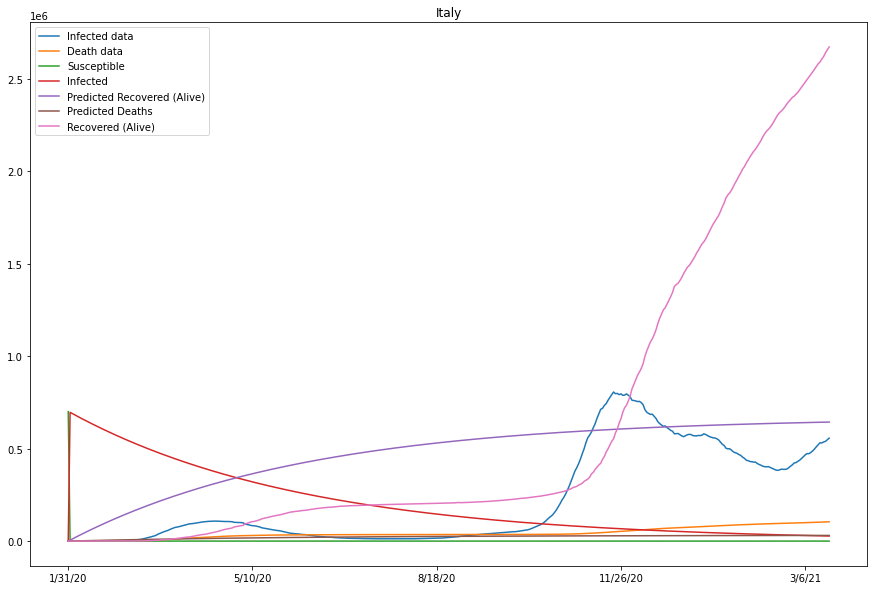

In [6]:
learner = Learner('Italy', **config['Italy'])
learner.train()
Italy_data = learner.plot()

In [7]:
raw_data = reformat_data(
    data_recovered[data_recovered['Country/Region'] == 'Italy'][data_recovered.columns[4:]],
    data_confirmed[data_confirmed['Country/Region'] == 'Italy'][data_confirmed.columns[4:]],
    data_deaths[data_deaths['Country/Region'] == 'Italy'][data_deaths.columns[4:]]
)

rnn_data = split_sequence(raw_data, 7, 1)

model = build_model(7, 3, 1)

history = model.fit(rnn_data[0][:400],
                          rnn_data[1][:400],
                          epochs=50, batch_size=8, verbose=0)

yhat = model.predict(rnn_data[0][400:])
pred_data = pd.DataFrame(data=yhat.reshape(-1, 3), columns=raw_data.columns)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


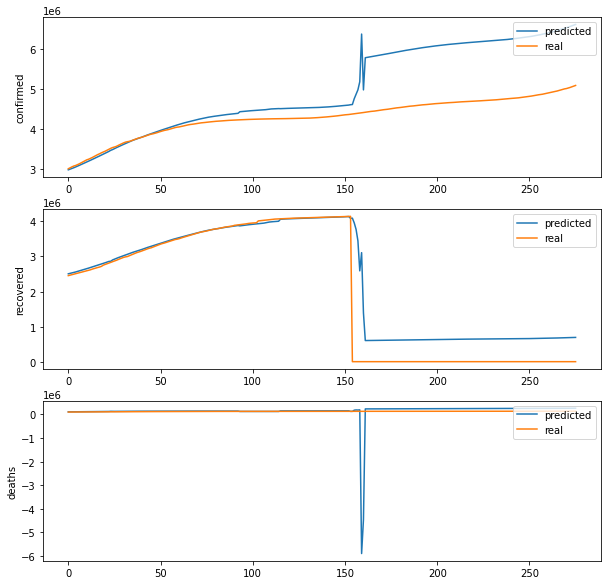

In [8]:
plot_results(pred_data, raw_data)

## Germany

      fun: 635524.1761468266
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.01164153, 5.44823706])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 7
     njev: 24
   status: 0
  success: True
        x: array([0.4       , 0.00783744])
      fun: 3189.637701543605
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([6855.4216341])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 44
      nit: 4
     njev: 22
   status: 0
  success: True
        x: array([0.00022395])
country=Germany, beta=0.40000000, gamma=0.00783744, r_0:51.03708496


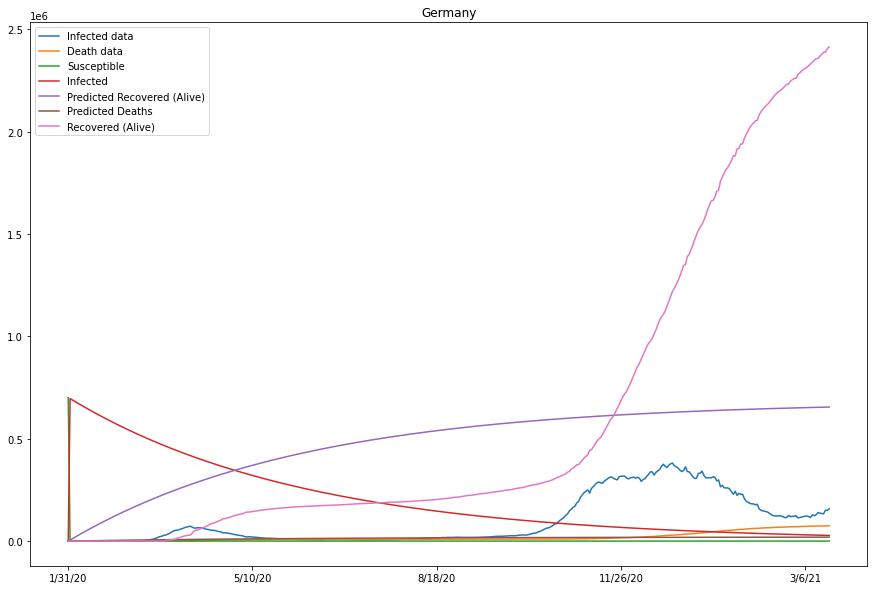

In [9]:
learner = Learner('Germany', **config['Germany'])
learner.train()
Germany_data = learner.plot()

In [10]:
raw_data = reformat_data(
    data_recovered[data_recovered['Country/Region'] == 'Germany'][data_recovered.columns[4:]],
    data_confirmed[data_confirmed['Country/Region'] == 'Germany'][data_confirmed.columns[4:]],
    data_deaths[data_deaths['Country/Region'] == 'Germany'][data_deaths.columns[4:]]
)

rnn_data = split_sequence(raw_data, 7, 1)

model = build_model(7, 3, 1)

history = model.fit(rnn_data[0][:400],
                          rnn_data[1][:400],
                          epochs=50, batch_size=8, verbose=0)

yhat = model.predict(rnn_data[0][400:])
pred_data = pd.DataFrame(data=yhat.reshape(-1, 3), columns=raw_data.columns)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


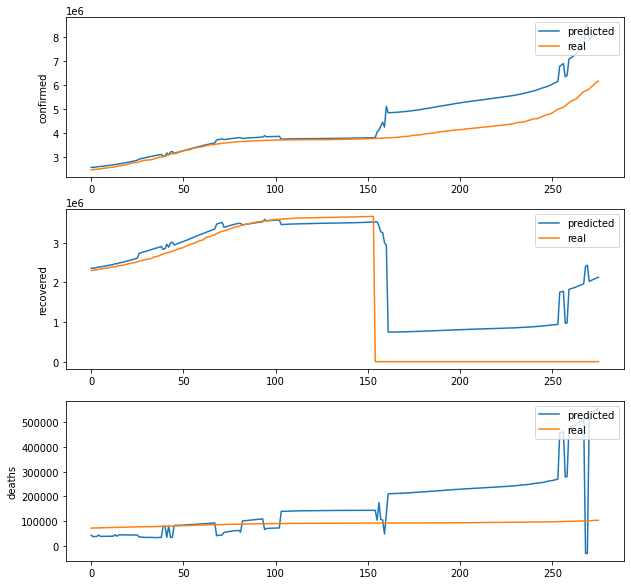

In [11]:
plot_results(pred_data, raw_data)

## China

      fun: 20093.764197205666
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.33266786e+12, -1.91583688e+06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 33
      nit: 3
     njev: 11
   status: 0
  success: True
        x: array([6.1502019e-07, 4.0000000e-01])
      fun: 381.03954115806795
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.84217094e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([0.0206544])
country=China, beta=0.00000062, gamma=0.40000000, r_0:0.00000154


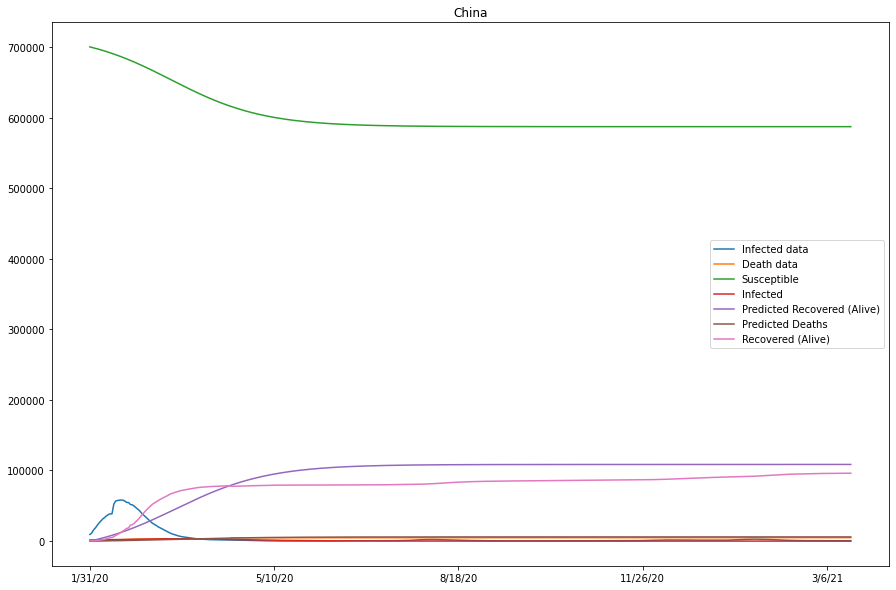

In [12]:
learner = Learner('China', **config['China'])
learner.train()
China_data = learner.plot()

In [13]:
raw_data = reformat_data(
    data_recovered[data_recovered['Country/Region'] == 'China'][data_recovered.columns[4:]],
    data_confirmed[data_confirmed['Country/Region'] == 'China'][data_confirmed.columns[4:]],
    data_deaths[data_deaths['Country/Region'] == 'China'][data_deaths.columns[4:]]
)

rnn_data = split_sequence(raw_data, 7, 1)

model = build_model(7, 3, 1)

history = model.fit(rnn_data[0][:400],
                          rnn_data[1][:400],
                          epochs=50, batch_size=8, verbose=0)

yhat = model.predict(rnn_data[0][400:])
pred_data = pd.DataFrame(data=yhat.reshape(-1, 3), columns=raw_data.columns)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


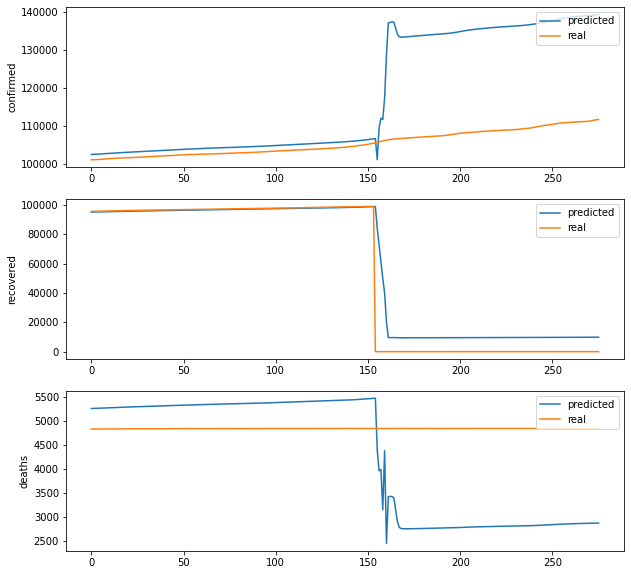

In [14]:
plot_results(pred_data, raw_data)

## Japan

      fun: 133021.11361340852
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1167.76791402,  -25.80927685])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 3
     njev: 8
   status: 0
  success: True
        x: array([0.00099993, 0.00102058])
      fun: 346.5685484563195
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([89.80016446])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 20
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([1.89943521e-05])
country=Japan, beta=0.00099993, gamma=0.00102058, r_0:0.97977548


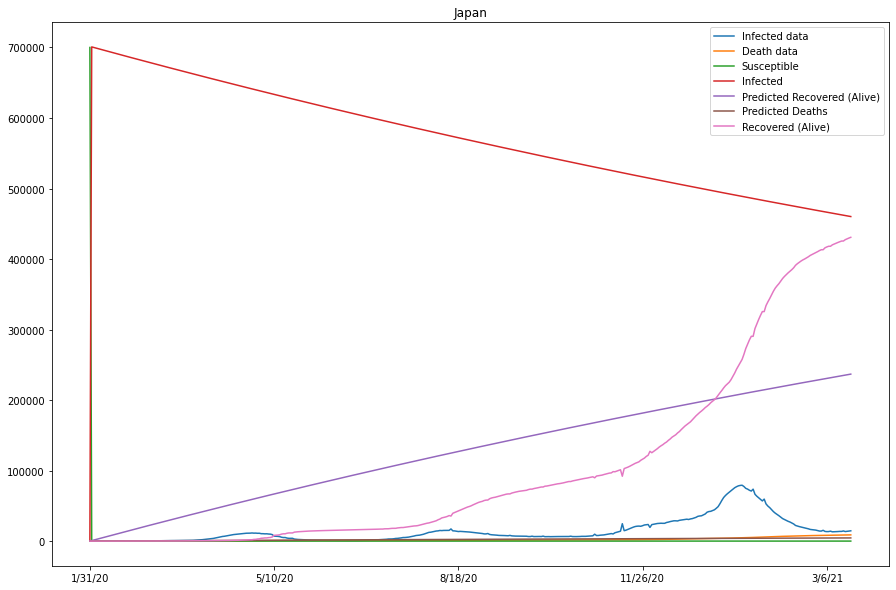

In [15]:
learner = Learner('Japan', **config['Japan'])
learner.train()
Japan_data = learner.plot()

In [16]:
raw_data = reformat_data(
    data_recovered[data_recovered['Country/Region'] == 'Japan'][data_recovered.columns[4:]],
    data_confirmed[data_confirmed['Country/Region'] == 'Japan'][data_confirmed.columns[4:]],
    data_deaths[data_deaths['Country/Region'] == 'Japan'][data_deaths.columns[4:]]
)

rnn_data = split_sequence(raw_data, 7, 1)

model = build_model(7, 3, 1)

history = model.fit(rnn_data[0][:400],
                          rnn_data[1][:400],
                          epochs=50, batch_size=8, verbose=0)

yhat = model.predict(rnn_data[0][400:])
pred_data = pd.DataFrame(data=yhat.reshape(-1, 3), columns=raw_data.columns)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


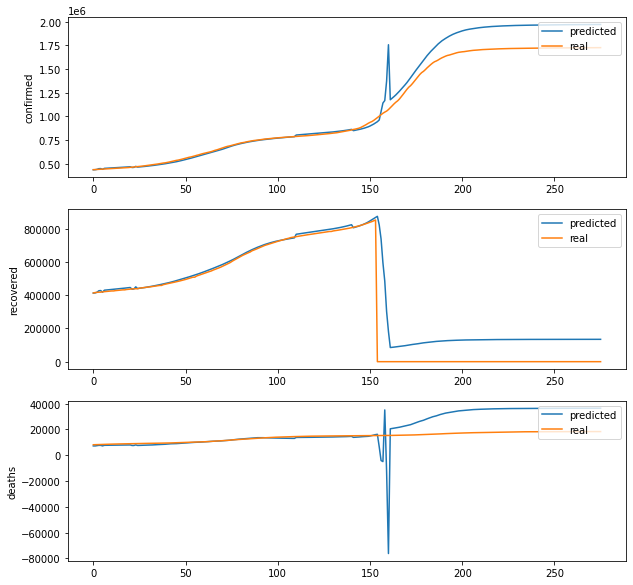

In [17]:
plot_results(pred_data, raw_data)

## Russia

      fun: 1227044.2743754955
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-563.03106278,   83.26023817])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 9
     njev: 24
   status: 0
  success: True
        x: array([0.39278188, 0.01301333])
      fun: 694.8552104125604
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([14246.70971347])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 5
     njev: 36
   status: 0
  success: True
        x: array([0.00028463])
country=Russia, beta=0.39278188, gamma=0.01301333, r_0:30.18303518


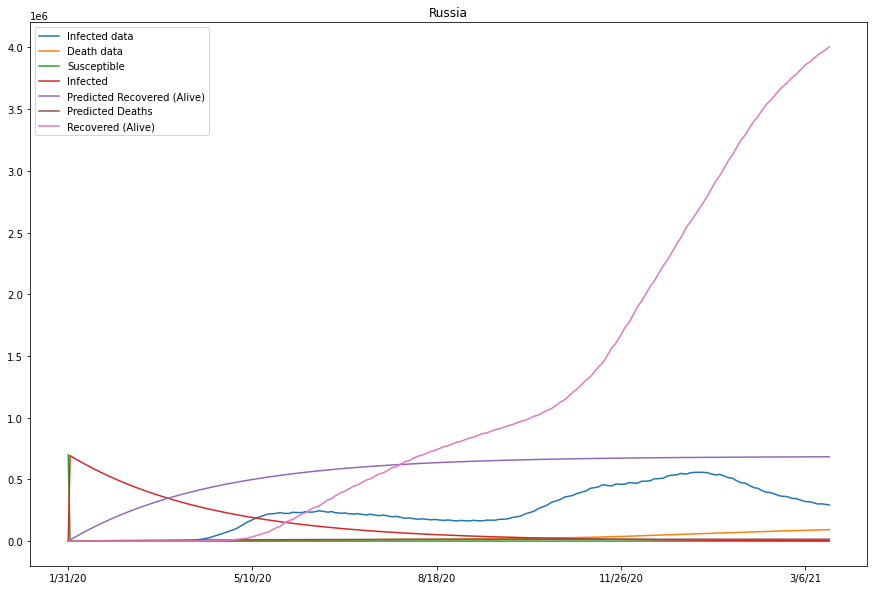

In [18]:
learner = Learner('Russia', **config['Russia'])
learner.train()
Russia_data = learner.plot()

In [19]:
raw_data = reformat_data(
    data_recovered[data_recovered['Country/Region'] == 'Russia'][data_recovered.columns[4:]],
    data_confirmed[data_confirmed['Country/Region'] == 'Russia'][data_confirmed.columns[4:]],
    data_deaths[data_deaths['Country/Region'] == 'Russia'][data_deaths.columns[4:]]
)

rnn_data = split_sequence(raw_data, 7, 1)

model = build_model(7, 3, 1)

history = model.fit(rnn_data[0][:400],
                          rnn_data[1][:400],
                          epochs=50, batch_size=8, verbose=0)

yhat = model.predict(rnn_data[0][400:])
pred_data = pd.DataFrame(data=yhat.reshape(-1, 3), columns=raw_data.columns)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


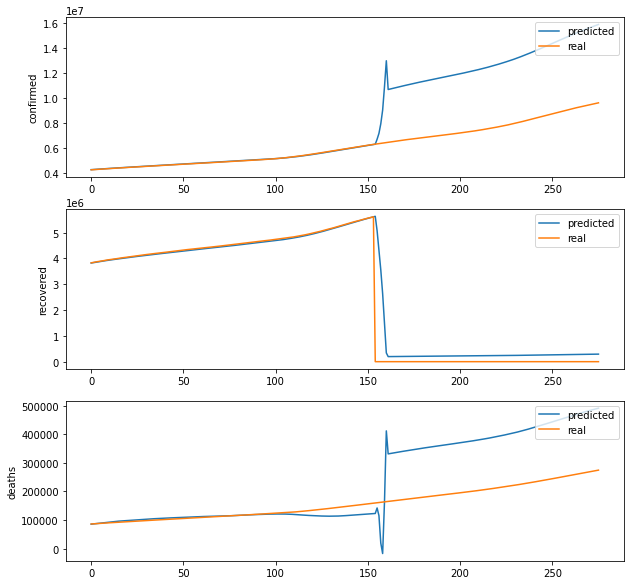

In [20]:
plot_results(pred_data, raw_data)

## Sweden

      fun: 14944.978771278085
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.78800039e+11, -9.05613252e+06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 111
      nit: 4
     njev: 37
   status: 0
  success: True
        x: array([2.44465161e-08, 2.44443240e-08])
      fun: 4019.0470704108707
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.7824404e+11])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1.e-08])
country=Sweden, beta=0.00000002, gamma=0.00000002, r_0:1.00008968


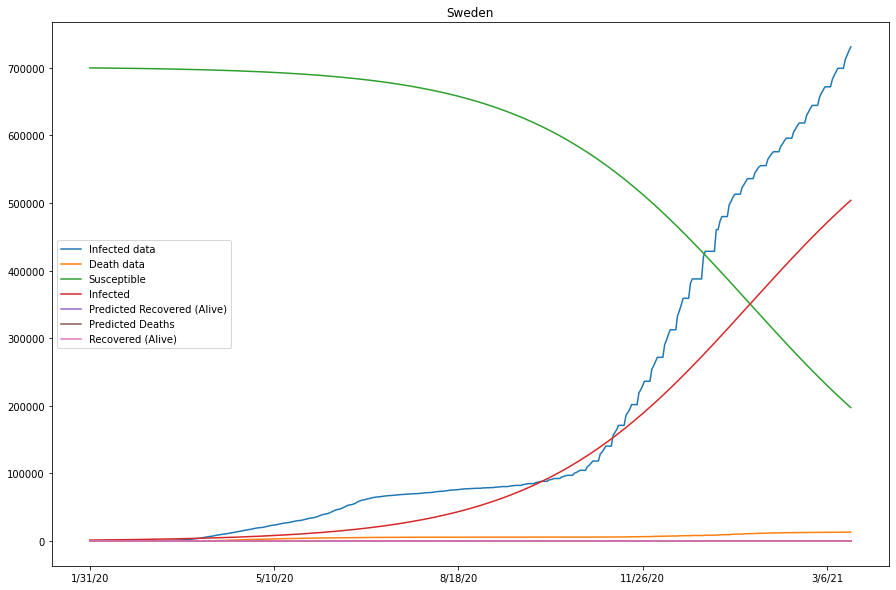

In [21]:
learner = Learner('Sweden', **config['Sweden'])
learner.train()
Sweden_data = learner.plot()

In [22]:
raw_data = reformat_data(
    data_recovered[data_recovered['Country/Region'] == 'Sweden'][data_recovered.columns[4:]],
    data_confirmed[data_confirmed['Country/Region'] == 'Sweden'][data_confirmed.columns[4:]],
    data_deaths[data_deaths['Country/Region'] == 'Sweden'][data_deaths.columns[4:]]
)

rnn_data = split_sequence(raw_data, 7, 1)

model = build_model(7, 3, 1)

history = model.fit(rnn_data[0][:400],
                          rnn_data[1][:400],
                          epochs=50, batch_size=8, verbose=0)

yhat = model.predict(rnn_data[0][400:])
pred_data = pd.DataFrame(data=yhat.reshape(-1, 3), columns=raw_data.columns)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


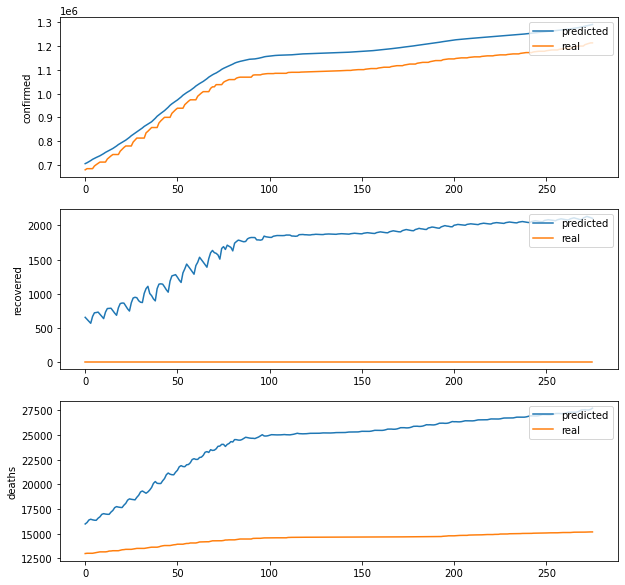

In [23]:
plot_results(pred_data, raw_data)

